Imagine these datasets represent the food consumption patterns created by NEOM employees on an annual bases. Previously, employees ordered freely, which led to waste and increased costs. With the introduction of the dining wallet system, you now have a fixed amount of points (money) per week to use for food. The objective is to analyze this data and explore how the new system would impact food waste, food consumption and sustainability practices.

Below there are **three** sections each analysing a different data set. Go through each section and derive your insights.


*   Food Waste Dataset
*   Restaurant Consumption Dataset
*   Food Choices Dataset
<br /><br />

Feel free to add your own analysis and combine datasets to come up with insights about food consumption habits



---
---
#**DATASET: Food Waste**



The **Food Waste UN EDA** dataset provides comprehensive information on food waste across various countries, focusing on household, retail, and food service sectors. Below is an overview and detailed description of the dataset:

## **Dataset Overview**

- **Description**: This dataset encompasses estimates of food waste at the household, retail, and food service levels for different countries, along with additional relevant data points.
- **Total Records**: 214 rows and 12 columns.
- **Source**: Kaggle

## **Column Descriptions**

1. **`Country`**: Name of the country.
2. **`combined figures (kg/capita/year)`**: Estimated amount of food waste generated per capita by households, Retail, and Food Services combined annually, measured in kilograms.
3. **`Household estimate (kg/capita/year)`**: Estimated amount of food waste per capita generated by households annually, measured in kilograms.
4. **`Household estimate (tonnes/year)`**: Estimated amount of food waste generated by households annually, measured in tonnes.
5. **`Retail estimate (kg/capita/year)`**: Estimated amount of food waste per capita generated by retail annually, measured in kilograms.
6. **`Retail estimate (tonnes/year)`**: Estimated amount of food waste generated by retial annually, measured in tonnes.
7. **`Food service estimate (kg/capita/year)`**: Estimated amount of food waste per capita generated by food service annually, measured in kilograms.
8. **`Food service estimate (tonnes/year)`**: Estimated amount of food waste generated by Food service annually, measured in tonnes.
9. **`Confidence in estimate`**: Categorization of the confidence level of the estimates assigned per country.
10. **`M49 code`**: United Nations M49 numerical code assigned to each country or area.
11. **`Region`**: Geographical region classification of the country.
12. **`Source`**: URL to the source of the estimates.


This dataset enables analysis of food waste patterns in relation to waste sources and regional differences.

---


## Import and Read the Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import numpy as np
import pandas as pd
import re
from collections import Counter

# Assuming kagglehub is installed, if not, uncomment the following line
# !pip install kagglehub
import kagglehub

In [66]:
# **Food Waste Dataset**


# Download latest version
path = kagglehub.dataset_download("joebeachcapital/food-waste")

print("Path to dataset files:", path)
extract_dir = path


# Iterate through the extracted files and read the first file found.
for root, dirs, files in os.walk(path):
    for file in files:
        file_path = os.path.join(root, file)
        # print(f"Attempting to read: {file_path}")
        try:
            # Attempt to read the file as a CSV
            df = pd.read_csv(file_path)
            print("Successfully read the file as a CSV.")

            # Data overview
            print(df.info())

        except pd.errors.ParserError:
            print(f"Could not parse {file_path} as a CSV. Trying next file...")
        except Exception as e:
            print(f"An error occurred while reading {file_path}: {e}")

df_foodwaste = df

Path to dataset files: /root/.cache/kagglehub/datasets/joebeachcapital/food-waste/versions/1
Successfully read the file as a CSV.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code    

## EDA - Explatotary Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [ ]:
df['Region'].unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Sub-Saharan Africa', 'Latin America and the Caribbean',
       'Western Asia', 'Australia and New Zealand', 'Western Europe',
       'Eastern Europe', 'Northern America', 'South-eastern Asia',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Polynesia',
       'Micronesia', 'Central Asia'], dtype=object)

In [ ]:
df.sample(5)

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
155,Republic of Korea,110,71,3657764,13,656263,26,1309852,Low Confidence,410,Eastern Asia,https://www.unep.org/resources/report/unep-foo...
108,Lesotho,144,100,211661,16,33240,28,58760,Very Low Confidence,426,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
127,Montenegro,127,83,51988,16,9822,28,17363,Very Low Confidence,499,Southern Europe,https://www.unep.org/resources/report/unep-foo...
198,Tuvalu,120,76,878,16,181,28,321,Very Low Confidence,798,Polynesia,https://www.unep.org/resources/report/unep-foo...
76,Gibraltar,123,84,2840,13,432,26,862,Low Confidence,292,Southern Europe,https://www.unep.org/resources/report/unep-foo...


In [ ]:
df[['combined figures (kg/capita/year)',
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)']].describe().apply(lambda x: ['{:.2f}'.format(i) for i in x])

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Retail estimate (kg/capita/year),Food service estimate (kg/capita/year)
count,214.00,214.00,214.00,214.00
mean,126.79,84.29,15.12,27.38
std,22.16,18.31,5.77,6.51
min,61.00,33.00,3.00,3.00
25%,115.00,74.00,13.00,26.00
50%,123.00,80.00,16.00,28.00
75%,137.75,95.00,16.00,28.00
max,260.00,189.00,79.00,90.00


##**Food Waste Per Capita**

###What is the ovreall Food Waste per capita distribution of all countries?

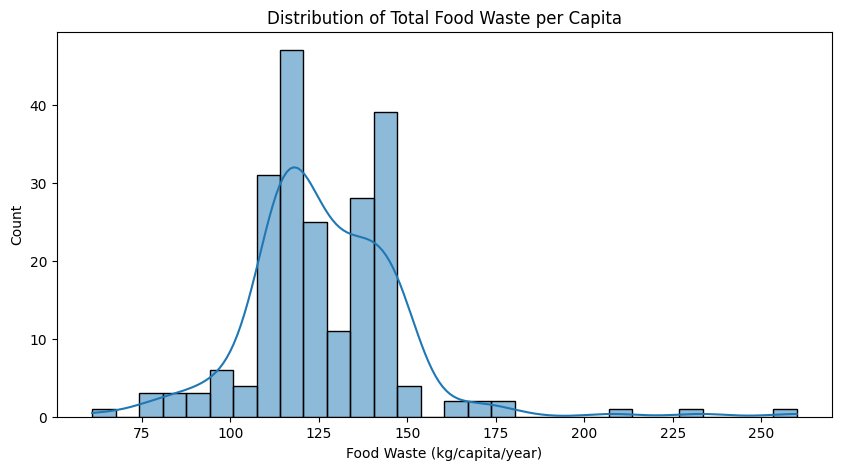

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["combined figures (kg/capita/year)"], bins=30, kde=True)
plt.title("Distribution of Total Food Waste per Capita")
plt.xlabel("Food Waste (kg/capita/year)")
plt.ylabel("Count")
plt.show()

###Which countries have the highest food waste per capita?

<ipython-input-11-a65b3721a7c2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="combined figures (kg/capita/year)", y="Country", palette="Reds_r")


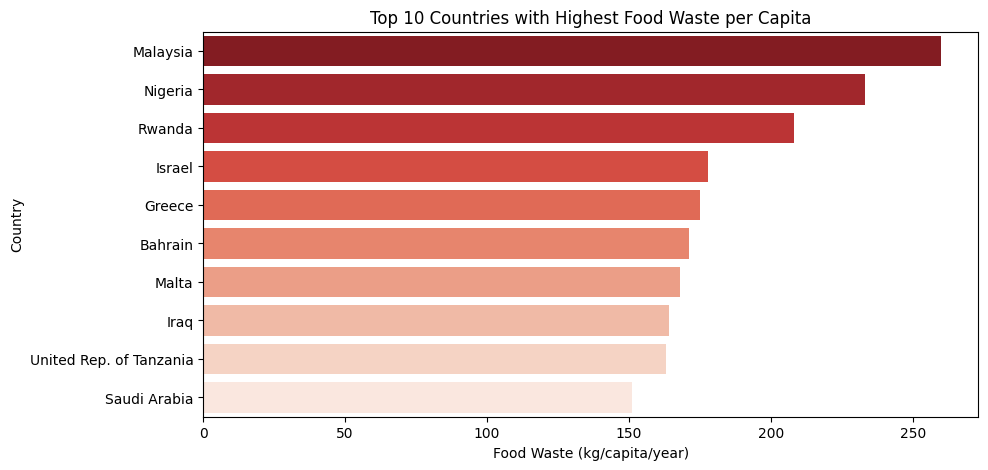

In [ ]:
top_countries = df.nlargest(10, "combined figures (kg/capita/year)")

plt.figure(figsize=(10, 5))
sns.barplot(data=top_countries, x="combined figures (kg/capita/year)", y="Country", palette="Reds_r")
plt.title("Top 10 Countries with Highest Food Waste per Capita")
plt.xlabel("Food Waste (kg/capita/year)")
plt.ylabel("Country")
plt.show()

###What is the distribution of food waste among the different sectors?

<ipython-input-12-ab92fa4371c3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="Sector", y="Waste (kg/capita)", palette="Set2")


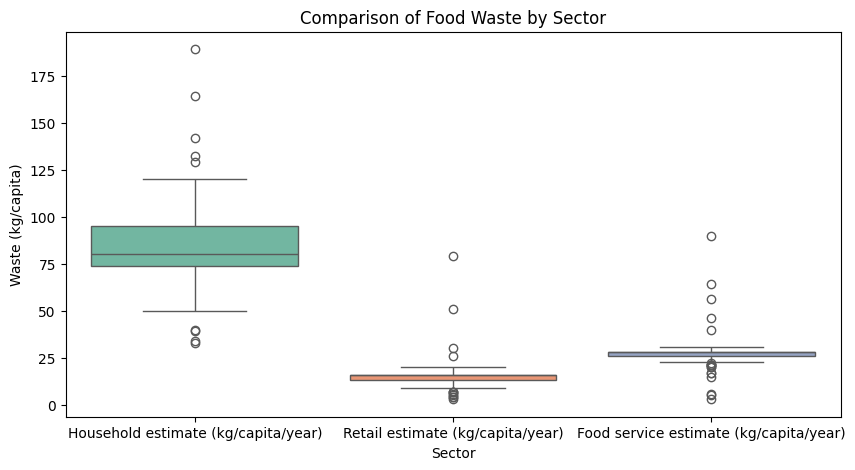

In [ ]:
plt.figure(figsize=(10, 5))

df_melted = df.melt(id_vars=["Country"],
                    value_vars=['Household estimate (kg/capita/year)',
                                'Retail estimate (kg/capita/year)',
                                'Food service estimate (kg/capita/year)'],
                    var_name="Sector", value_name="Waste (kg/capita)")

sns.boxplot(data=df_melted, x="Sector", y="Waste (kg/capita)", palette="Set2")
plt.title("Comparison of Food Waste by Sector")
# plt.xticks(rotation=15)
plt.show()

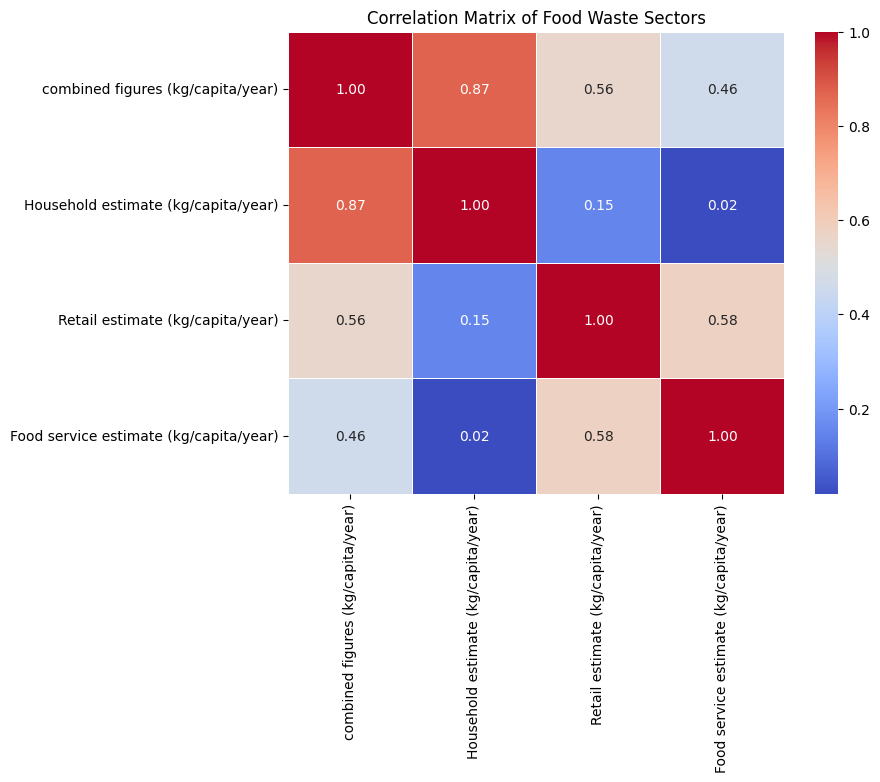

In [ ]:
sector_cols = [
    "combined figures (kg/capita/year)",
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)'
]

# Compute the correlation matrix
correlation_matrix = df[sector_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Food Waste Sectors")
plt.show()

###Which Regions have the highest food waste per capita?

<ipython-input-42-2a8c13becd69>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regions, x="combined figures (kg/capita/year)", y="Region", palette="Reds_r")


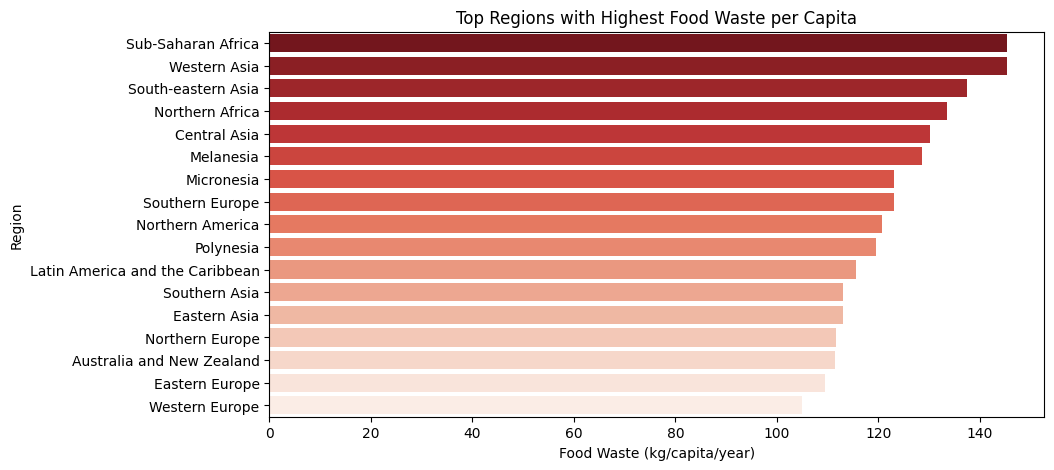

In [ ]:
top_regions = df.nlargest(20, "combined figures (kg/capita/year)")
top_regions = df.groupby('Region')['combined figures (kg/capita/year)'].mean().reset_index().sort_values(by='combined figures (kg/capita/year)', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_regions, x="combined figures (kg/capita/year)", y="Region", palette="Reds_r")
plt.title("Top Regions with Highest Food Waste per Capita")
plt.xlabel("Food Waste (kg/capita/year)")
plt.ylabel("Region")
plt.show()

<ipython-input-31-2ee90b355adf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Region", y="combined figures (kg/capita/year)", palette="coolwarm")


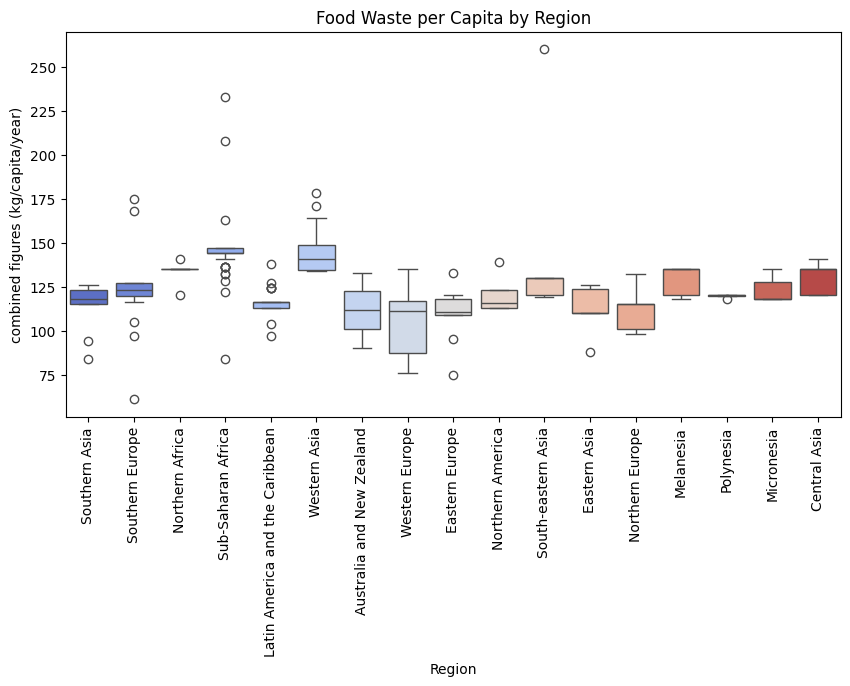

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Region", y="combined figures (kg/capita/year)", palette="coolwarm")
plt.title("Food Waste per Capita by Region")
plt.xticks(rotation=90)
plt.show()

## **Saudi Arabia Specific Analysis**


### Extract Data for Saudi Arabia

In [ ]:
# Filter data for Saudi Arabia
saudi_df = df[df["Country"] == "Saudi Arabia"]

# Display Saudi Arabia's food waste data
saudi_df

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
167,Saudi Arabia,151,105,3594080,20,673502,26,876260,High Confidence,682,Western Asia,https://www.unep.org/resources/report/unep-foo...


### Compare Saudi Arabia’s Food Waste with Global Averages

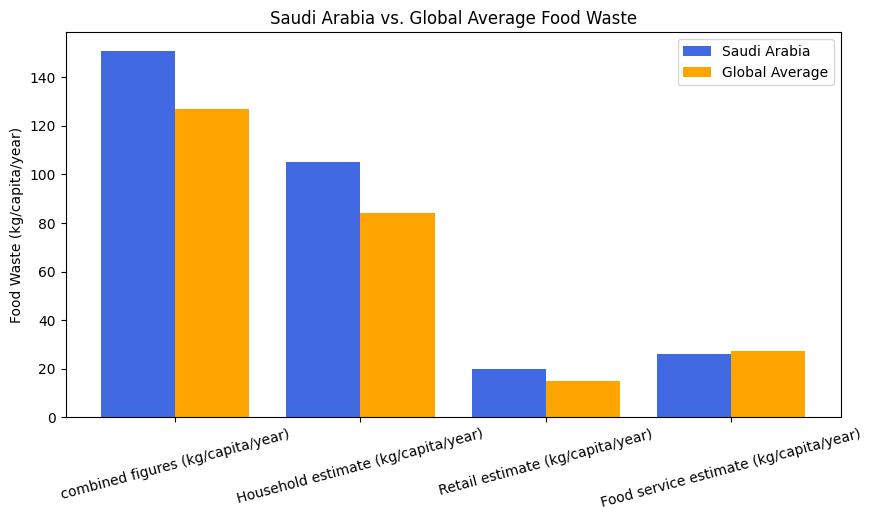

In [ ]:
# Compute global averages
global_avg = df[["combined figures (kg/capita/year)",
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)']].mean()

# Extract Saudi Arabia’s values
saudi_values = saudi_df[["combined figures (kg/capita/year)",
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)']].values.flatten()

# Create a comparison DataFrame
comparison_df = pd.DataFrame({"Category": global_avg.index,
                              "Saudi Arabia": saudi_values,
                              "Global Average": global_avg.values})

# Comparison table
comparison_df

# Plot comparison of Saudi Arabia vs. Global Average
plt.figure(figsize=(10, 5))
bar_width = 0.4
indices = np.arange(len(comparison_df))

plt.bar(indices, comparison_df["Saudi Arabia"], width=bar_width, label="Saudi Arabia", color="royalblue")
plt.bar(indices + bar_width, comparison_df["Global Average"], width=bar_width, label="Global Average", color="orange")

plt.xticks(indices + bar_width / 2, comparison_df["Category"], rotation=15)
plt.ylabel("Food Waste (kg/capita/year)")
plt.title("Saudi Arabia vs. Global Average Food Waste")
plt.legend()
plt.show()

### Sectoral Contribution of Food Waste in Saudi Arabia

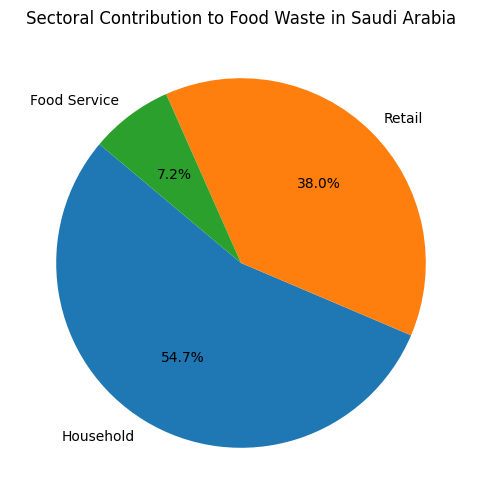

In [ ]:
# Pie chart of food waste distribution in Saudi Arabia
plt.figure(figsize=(8, 6))
sector_values = saudi_values[:-1]  # Exclude total waste
sector_labels = ["Household", "Retail", "Food Service"]

plt.pie(sector_values, labels=sector_labels, autopct="%1.1f%%", startangle=140)
plt.title("Sectoral Contribution to Food Waste in Saudi Arabia")
plt.show()

 Saudi Arabia’s Rank in Food Waste Per Capita

In [ ]:
# Rank Saudi Arabia in terms of Total Food Waste (kg/capita/year)
df_sorted = df.sort_values("combined figures (kg/capita/year)", ascending=False).reset_index(drop=True)
saudi_rank = df_sorted[df_sorted["Country"] == "Saudi Arabia"].index[0] + 1

print(f"Saudi Arabia ranks {saudi_rank} in Total Food Waste per Capita globally.")

Saudi Arabia ranks 10 in Total Food Waste per Capita globally.


You can download the notebook to do further analysis.

In [ ]:
# %%shell
# jupyter nbconvert --to html /content/DataPuzzle_Dataset.ipynb

---
---
# **DATASET: Restaurant Consumption**

## **Dataset Overview**

*  **`Dascription`**:
The Dataset provides detailed insights into dining patterns and item-level sales data, collected between January 1, 2019, at 11:30 AM to June 30, 2019, at 8:30 PM, covering a period of nearly six months.

*  **`Total Records`**: 9 columns and 18,100 rows.

*  **`Usecases`**: Menu planning and performance, Sales trends and pricing strategies, Customer segmentation and preferences, and Analyzing consumption patterns.

*  **`Source`**: Kaggle

## **Column Descriptions**

1. **`Date_time`**: Exact date and time of the order.  
2. **`Shift`**: Service period (e.g., Lunch, Dinner).  
3. **`Day Type`**: Type of day (Weekday, Weekend).  
4. **`Day`**: Calendar day of the month (e.g., Monday, Tuesday).
5. **`GatheringSize`**: Number of people in the dining group.  
6. **`MenuCategory`**: Broad menu category.  
7. **`MenuItem`**: Specific menu item ordered.  
8. **`ItemPrice`**: Price of the menu item.  
9. **`ItemQty`**: Quantity of the item ordered.  
10. **`hour`**: Hour of the order (24-hour format).   

---



## Import and Read the Data

In [76]:
# **Restaurant Consumption Dataset**


# Download latest version
path = kagglehub.dataset_download("nilaydesmukh/restaurant-food-consumption")

print("Path to dataset files:", path)
extract_dir = path


# Iterate through the extracted files and read the first file found.
for root, dirs, files in os.walk(path):
    for file in files:
        file_path = os.path.join(root, file)
        # print(f"Attempting to read: {file_path}")
        try:
            # Attempt to read the file as a Excel
            df = pd.read_excel(file_path)
            print("Successfully read the file as a Excel.")

            # Data overview
            print(df.info())

        except pd.errors.ParserError:
            print(f"Could not parse {file_path} as a Excel. Trying next file...")
        except Exception as e:
            print(f"An error occurred while reading {file_path}: {e}")

df_restaurant = df

Path to dataset files: /root/.cache/kagglehub/datasets/nilaydesmukh/restaurant-food-consumption/versions/1
Successfully read the file as a Excel.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18100 entries, 0 to 18099
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date_time     18100 non-null  datetime64[ns]
 1   Shift         18100 non-null  object        
 2   Day Type      18100 non-null  object        
 3   Day           18100 non-null  object        
 4   PartySize     18100 non-null  int64         
 5   MenuCateogry  18100 non-null  object        
 6   MenuItem      18100 non-null  object        
 7   ItemPrice     18100 non-null  float64       
 8   ItemQty       18100 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB
None


## EDA - Explatotary Data Analysis

In [77]:
df.rename(columns={'PartySize': 'GatheringSize'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18100 entries, 0 to 18099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_time      18100 non-null  datetime64[ns]
 1   Shift          18100 non-null  object        
 2   Day Type       18100 non-null  object        
 3   Day            18100 non-null  object        
 4   GatheringSize  18100 non-null  int64         
 5   MenuCateogry   18100 non-null  object        
 6   MenuItem       18100 non-null  object        
 7   ItemPrice      18100 non-null  float64       
 8   ItemQty        18100 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [78]:
df.sample(5)

,Date_time,Shift,Day Type,Day,GatheringSize,MenuCateogry,MenuItem,ItemPrice,ItemQty
15392,2019-06-03 20:30:00,Dinner,Weekday,Monday,2,Breads,Garlic naan,3.5,2
13546,2019-05-16 12:30:00,Lunch,Weekday,Thursday,4,Vegetable specials,Bhindi do piazza,16.0,1
9900,2019-04-10 11:30:00,Lunch,Weekend,Wednesday,3,Breads,Onion kulcha,5.0,1
11123,2019-04-22 12:05:00,Lunch,Weekday,Monday,5,Chicken specials,Chicken saag,18.0,1
4995,2019-02-19 20:30:00,Dinner,Weekday,Tuesday,0,Chicken specials,Butter chicken,18.0,3


### Menu items

<ipython-input-87-efa102a11a35>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return data.applymap(lambda x: '\n'.join(x[i:i+30] for i in range(0, len(x), 30)) if isinstance(x, str) else x)
<ipython-input-87-efa102a11a35>:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


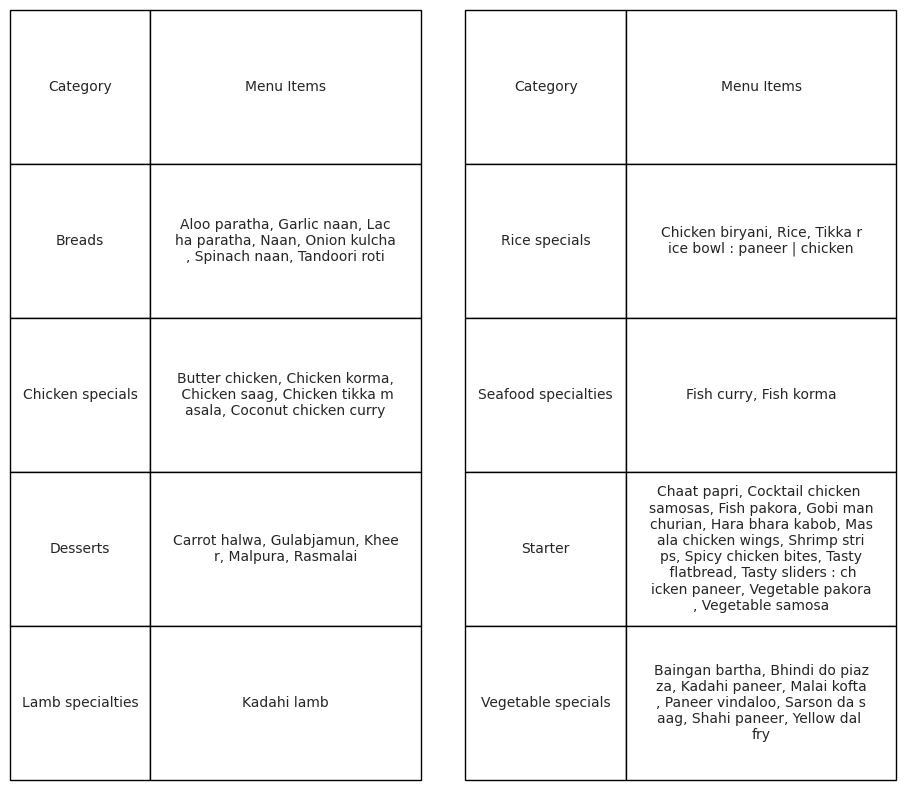

In [87]:

grouped_data = (
    df.groupby('MenuCateogry')['MenuItem']
    .apply(lambda items: ', '.join(sorted(set(items))))
    .reset_index()
)

grouped_data.columns = ['Category', 'Menu Items']

grouped_data.to_csv("grouped_menu_items.csv", index=False)

mid_index = len(grouped_data) // 2
table_left = grouped_data.iloc[:mid_index]
table_right = grouped_data.iloc[mid_index:]


fig, axes = plt.subplots(1, 2, figsize=(10, 8), gridspec_kw={'wspace': 0.5, 'width_ratios': [1, 1]})

for ax in axes:
    ax.axis('tight')
    ax.axis('off')

def wrap_text(data):
    """Wrap text in the table cells with explicit line breaks."""
    return data.applymap(lambda x: '\n'.join(x[i:i+30] for i in range(0, len(x), 30)) if isinstance(x, str) else x)

table_left_wrapped = wrap_text(table_left)
table_right_wrapped = wrap_text(table_right)

table_left_visual = axes[0].table(
    cellText=table_left_wrapped.values,
    colLabels=table_left_wrapped.columns,
    loc='center',
    cellLoc='center'
)

table_right_visual = axes[1].table(
    cellText=table_right_wrapped.values,
    colLabels=table_right_wrapped.columns,
    loc='center',
    cellLoc='center'
)

for table in [table_left_visual, table_right_visual]:
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(table_left.columns))))

    for key, cell in table.get_celld().items():
        cell.set_height(0.25)
        cell.set_text_props(ha='center', va='center')

plt.tight_layout()
plt.show()


### Menu Prices

<ipython-input-88-c3522a35da4a>:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


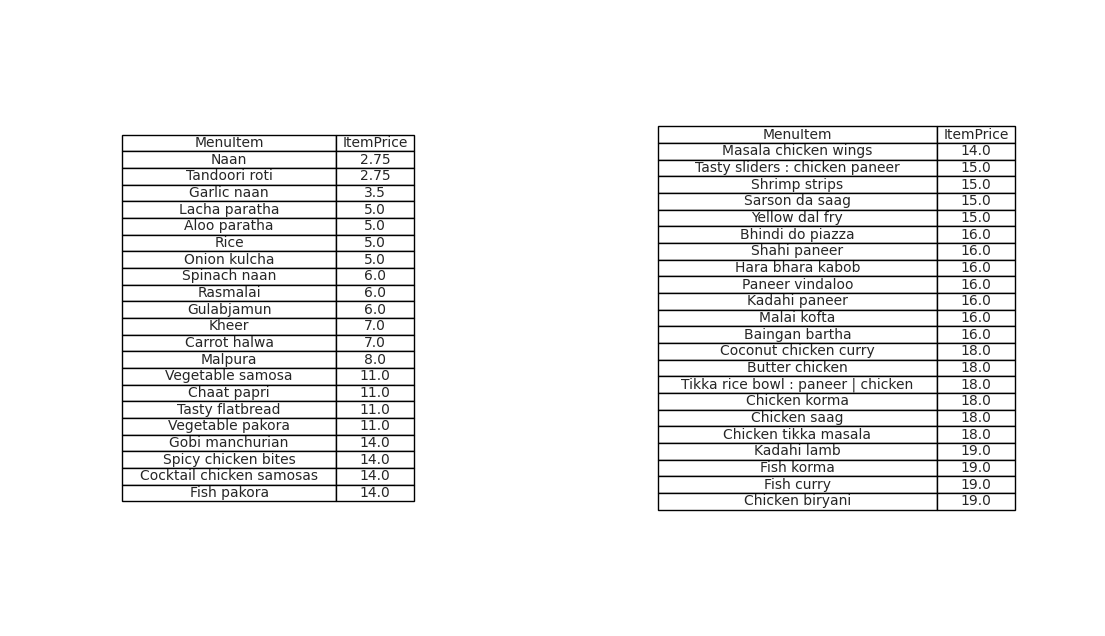

In [88]:

menu_price_table = df[['MenuItem', 'ItemPrice']].drop_duplicates()


menu_price_table_sorted = menu_price_table.sort_values(by=['ItemPrice'])



mid_index = len(menu_price_table_sorted) // 2
table_left = menu_price_table_sorted.iloc[:mid_index]
table_right = menu_price_table_sorted.iloc[mid_index:]


mid_index = len(menu_price_table_sorted) // 2
table_left = menu_price_table_sorted.iloc[:mid_index]
table_right = menu_price_table_sorted.iloc[mid_index:]

fig, axes = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'wspace': 0.1})

for ax in axes:
    ax.axis('tight')
    ax.axis('off')

table_left_visual = axes[0].table(
    cellText=table_left.values,
    colLabels=table_left.columns,
    loc='center',
    cellLoc='center'
)

table_right_visual = axes[1].table(
    cellText=table_right.values,
    colLabels=table_right.columns,
    loc='center',
    cellLoc='center'
)

for table in [table_left_visual, table_right_visual]:
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(table_left.columns))))

plt.tight_layout()
plt.show()


##**Price Analysis**

In [79]:
min_price = df['ItemPrice'].min()
max_price = df['ItemPrice'].max()
print(f"The Minimum Price of Food' is: {min_price} and the maximim is {max_price}")

The Minimum Price of Food' is: 2.75 and the maximim is 19.0


### Menu Price Distribution

<ipython-input-80-9bfc3a65a28c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=price_counts.index, y=price_counts.values, palette="flare")


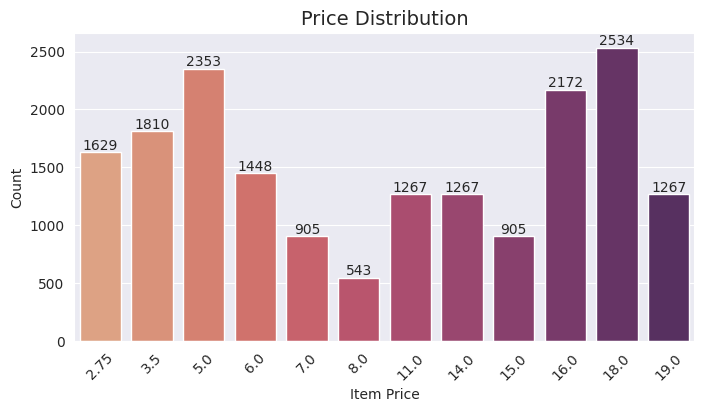

In [80]:
unique_prices = sorted(df['ItemPrice'].unique())
unique_menu_Items = df['MenuItem'].unique()

price_counts = df['ItemPrice'].value_counts().sort_index()

sns.set_style("darkgrid")


plt.figure(figsize=(8, 4))
ax = sns.barplot(x=price_counts.index, y=price_counts.values, palette="flare")


for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.0f', label_type='edge')


plt.title('Price Distribution', fontsize=14)
plt.xlabel('Item Price')
plt.ylabel('Count')


plt.xticks(rotation=45)

plt.show()


## Menu Analysis

### Menu Categories Distribution

<ipython-input-81-27b1fd921301>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette="flare")


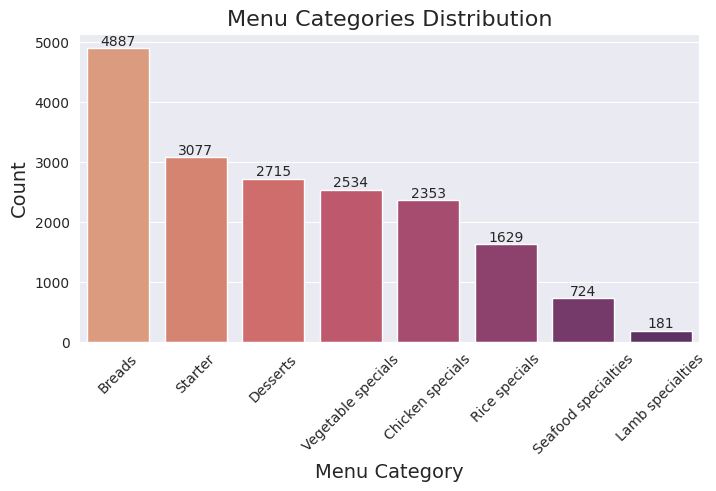

In [81]:

category_counts = df['MenuCateogry'].value_counts()


plt.figure(figsize=(8, 4))
sns.set_style("darkgrid")
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette="flare")


for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.0f', label_type='edge')


plt.title('Menu Categories Distribution', fontsize=16)
plt.xlabel('Menu Category', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.xticks(rotation=45)


plt.show()

#Insight: Underperforming categories may cause waste. Simplifying main dish options to focus on popular items could reduce that.

### Popular Menu Categories & Items

<ipython-input-82-740f1c216257>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


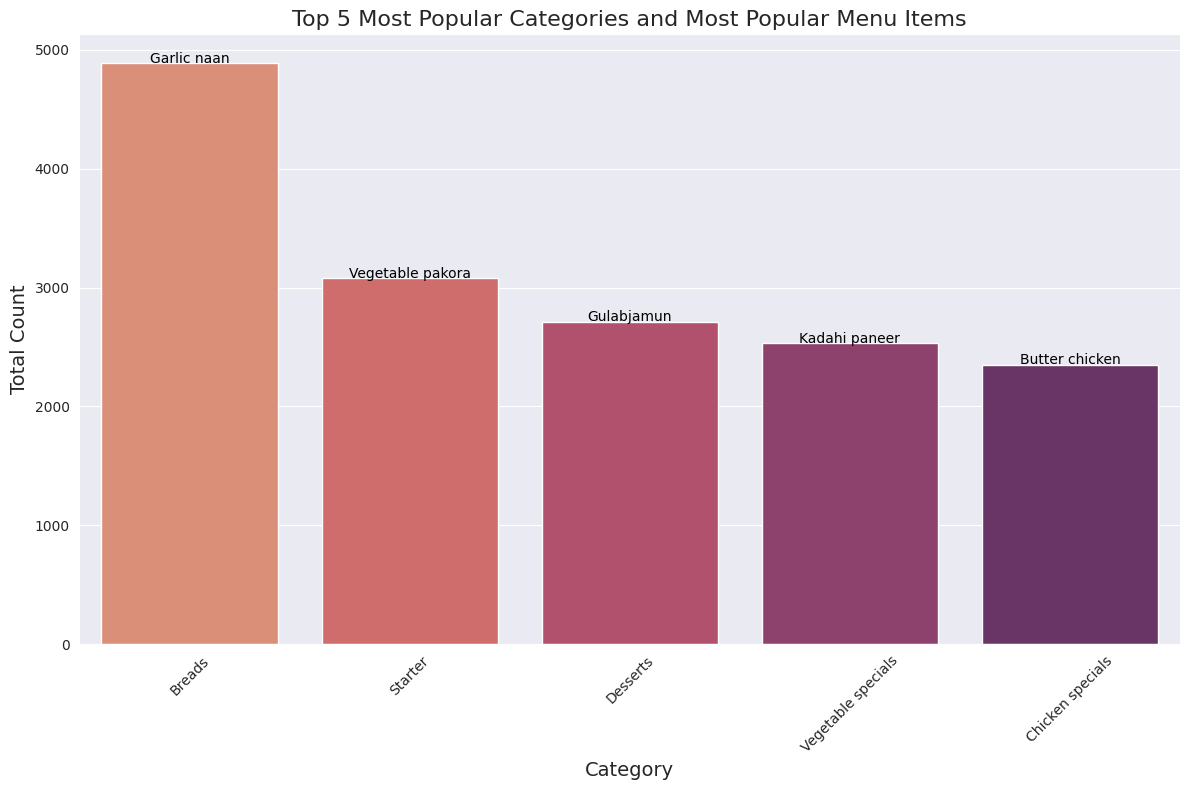

In [82]:

category_popularity = df.groupby('MenuCateogry').size().sort_values(ascending=False)

top_categories = category_popularity.head(5).index

popular_items = (
    df[df['MenuCateogry'].isin(top_categories)]
    .groupby('MenuCateogry')['MenuItem']
    .apply(lambda x: x.value_counts().idxmax())
    .reset_index()
)
popular_items.columns = ['Category', 'PopularItem']

top_category_data = category_popularity.loc[top_categories].reset_index()
top_category_data.columns = ['Category', 'Count']
top_category_data = top_category_data.merge(popular_items, on='Category')

plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")

ax = sns.barplot(
    x='Category',
    y='Count',
    data=top_category_data,
    palette="flare"
)

for i, row in top_category_data.iterrows():
    ax.text(
        i,
        row['Count'] + 1,
        row['PopularItem'],
        ha='center',
        fontsize=10,
        color='black'
    )

plt.title('Top 5 Most Popular Categories and Most Popular Menu Items', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


##**Consumption Analysis**

### Orders by Day and Time

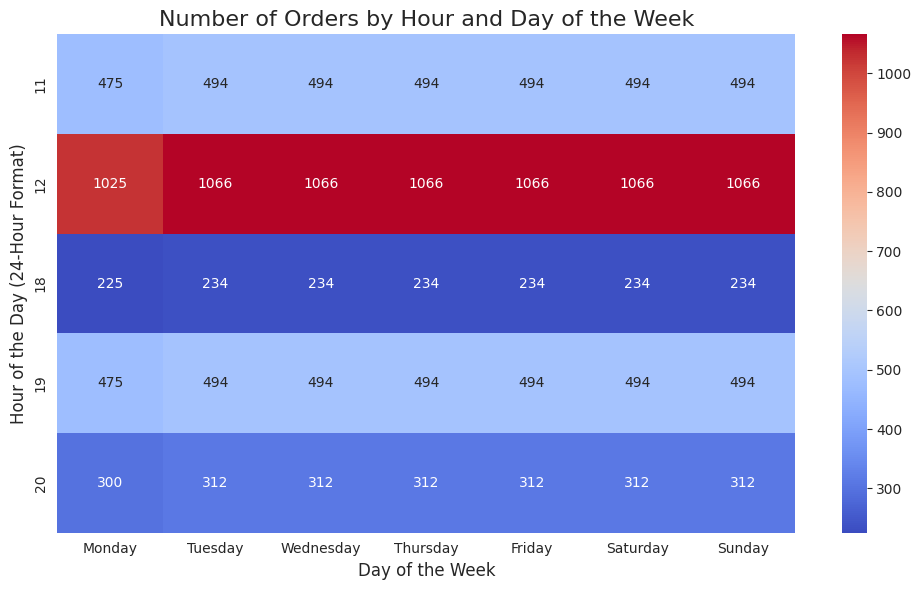

In [83]:

df['Date_time'] = pd.to_datetime(df['Date_time'])


df['hour'] = df['Date_time'].dt.hour
df['DayOfWeek'] = df['Date_time'].dt.dayofweek


day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_mapping = {i: day for i, day in enumerate(day_order)}


df['DayName'] = df['DayOfWeek'].map(day_mapping)


hourly_trends = df.pivot_table(index='hour', columns='DayName', values='MenuItem', aggfunc='count')


hourly_trends = hourly_trends[day_order]


plt.figure(figsize=(10, 6))
ax = sns.heatmap(hourly_trends, cmap='coolwarm', annot=True, fmt=".0f")


plt.title("Number of Orders by Hour and Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Hour of the Day (24-Hour Format)", fontsize=12)


plt.tight_layout()


plt.show()
# Insight: Align preparation and staffing with peak hours while avoiding overproduction during off-peak periods.

### Items Quantity Ordered for Small vs. Big Gatherings

<Figure size 1200x600 with 0 Axes>

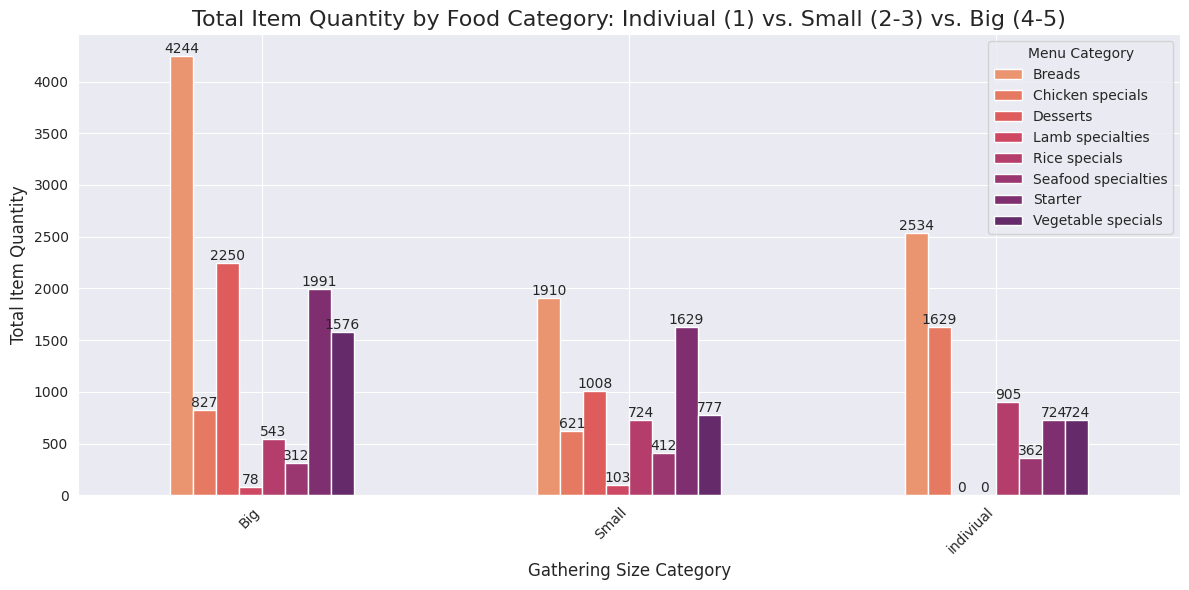

In [86]:
unique_gathering_size = df['GatheringSize'].unique()
unique_itemquantity = df['ItemQty'].unique()

def gathering_size(size):
    if size == 0:
        return 'indiviual'
    elif 2 <= size <= 3:
        return 'Small'
    elif 4 <= size <= 5:
        return 'Big'
    else:
        return 'Other'


df['GatheringSizeCategory'] = df['GatheringSize'].apply(gathering_size)


filtered_df = df[df['GatheringSizeCategory'] != 'Exclude']



grouped_data = filtered_df.groupby(['GatheringSizeCategory', 'MenuCateogry'])['ItemQty'].sum().unstack()


colors = sns.color_palette("flare", n_colors=len(grouped_data.columns))


plt.figure(figsize=(12, 6))
ax = grouped_data.plot(kind='bar', figsize=(12, 6), color=colors)


for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt='%.0f', label_type='edge')


plt.title('Total Item Quantity by Food Category: Indiviual (1) vs. Small (2-3) vs. Big (4-5)', fontsize=16)
plt.xlabel('Gathering Size Category', fontsize=12)
plt.ylabel('Total Item Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Menu Category', fontsize=10)
plt.tight_layout()


plt.show()
# Insight: Tailor menu options and portion sizes to different party sizes to minimize leftovers.

---
---
# **DATASET: Food Choices**

The "FOOD CHOICES" dataset provides insights into various factors influencing individuals' food preferences and consumption habits.

## **Dataset Overview**

* **`Description`**: This dataset encompasses a range of variables related to personal demographics, dietary habits, and perceptions about food.

* **`Total Records`**: The dataset contains 61 columns and 125 rows.

* **`Use Cases`**: Potential applications include analyzing the impact of demographics on food choices, understanding the relationship between academic performance and diet, and exploring factors contributing to comfort food preferences.

* **`Source`**: Kaggle

## **Column Descriptions**

1. **`GPA`**: Grade Point Average of the respondent.
2. **`Gender`**: Gender of the respondent.
3. **`breakfast`**: Frequency of breakfast consumption.
4. **`calories_chicken`**: Estimated calorie intake from chicken.
5. **`calories_day`**: Total daily calorie intake.
6. **`calories_scone`**: Estimated calorie intake from scones.
7. **`coffee`**: Frequency of coffee consumption.
8. **`comfort_food`**: Types of food considered as comfort food.
9. **`comfort_food_reasons`**: Reasons for choosing certain comfort foods.
10. **`cook`**: Frequency of cooking meals.
11. **`cuisine`**: Preferred types of cuisine.
12. **`diet_current`**: Current dietary practices.
14. **`drink`**: Frequency of alcohol consumption.
15. **`eating_changes`**: indications of changes in eating paterns.
16. **`eating_out`**: Frequency of eating out.
17. **`employment`**: Employment status of the respondent.
18. **`ethnic_food`**: Preference for ethnic foods.
19. **`exercise`**: Frequency of physical exercise.
20. **`father_education`**: Educational level of the respondent's father.
21. **`father_profession`**: Profession of the respondent's father.
22. **`fav_cuisine`**: Favorite cuisine type.
23. **`fav_food`**: Favorite food items.
24. **`food_childhood`**: Foods commonly consumed during childhood.
25. **`fries`**: Frequency of consuming fries.
26. **`fruit_day`**: Number of fruit servings per day.
27. **`grade_level`**: Academic grade level of the respondent.
28. **`greek_food`**: Preference for Greek food.
29. **`healthy_feeling`**: Perception of personal healthiness.
30. **`healthy_meal`**: Frequency of consuming healthy meals.
31. **`ideal_diet`**: Perception of an ideal diet.
32. **`income`**: Income level of the respondent.
33. **`indian_food`**: Preference for Indian food.
34. **`italian_food`**: Preference for Italian food.
35. **`life_rewarding`**: Perception of life as rewarding.
36. **`marital_status`**: Marital status of the respondent.
37. **`meals_dinner_friend`**: Frequency of having dinner with friends.
38. **`mother_education`**: Educational level of the respondent's mother.
39. **`mother_prefession`**: Prefession of the respondent's mother.
40. **`nutritional_check`**: Frequency of checking nutritional information.
41. **`on_off_campus`**: Living situation (on or off campus).
42. **`parents_cook`**: Frequency of parents cooking meals.
43. **`pay_meal_out`**: Willingness to pay for meals when eating out.
44. **`persian_food`**: Preference for Persian food.
45. **`self_perception_weight`**: Self-perception of weight.
46. **`soup`**: Frequency of consuming soup.
47. **`sports`**: Participation in sports activities.
48. **`thai_food`**: Preference for Thai food.
49. **`tortilla_calories`**: Estimated calorie intake from tortillas.
50. **`turkey_calories`**: Estimated calorie intake from turkey.
51. **`type_sports`**:  .
52. **`veggies_day`**: Number of vegetable servings per day.
53. **`vitamins`**: Frequency of taking vitamin supplements.
54. **`waffle_calories`**: Estimated calorie intake from waffle.
55. **`weight`**: reported weight.


*Note: The dataset contains additional columns beyond those listed above, each capturing various aspects of respondents' food-related behaviors and preferences. Columns marked as "_coded" are encoded values representing the indicated column.*


---

## Import and Read the Data

In [67]:
# **Food Choices Dataset**


# Download latest version
path = kagglehub.dataset_download("ameythakur20/food-coded")

print("Path to dataset files:", path)
extract_dir = path


# Iterate through the extracted files and read the first file found.
for root, dirs, files in os.walk(path):
    for file in files:
        file_path = os.path.join(root, file)
        # print(f"Attempting to read: {file_path}")
        try:
            # Attempt to read the file as a CSV
            df = pd.read_csv(file_path)
            print("Successfully read the file as a CSV.")

            # Data overview
            print(df.info())

        except pd.errors.ParserError:
            print(f"Could not parse {file_path} as a CSV. Trying next file...")
        except Exception as e:
            print(f"An error occurred while reading {file_path}: {e}")

df_foodchoices = df

Path to dataset files: /root/.cache/kagglehub/datasets/ameythakur20/food-coded/versions/1
Successfully read the file as a CSV.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 

## Clean and Ingest Data

In [68]:
# List of columns to clean
columns_to_clean = [
    "comfort_food", "comfort_food_reasons", "diet_current",
    "father_profession", "mother_profession", "fav_cuisine",
    "healthy_meal", "ideal_diet", "meals_dinner_friend",
    "type_sports", "weight"
]

# Function to clean text data
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower().strip()  # Lowercase and trim whitespace
    text = re.sub(r"[^a-z0-9, ]", "", text)  # Remove special characters
    return text

# Apply the cleaning function to the specified columns
for col in columns_to_clean:
    df[col] = df[col].apply(clean_text)

# Function to split entries into lists
def split_to_list(text):
    if text == "":
        return []
    return re.split(r",\s*|\s+", text)  # Split by commas or spaces

# Apply the splitting function to relevant columns
# list_columns = ["comfort_food", "comfort_food_reasons", "fav_cuisine", "type_sports"]
list_columns = columns_to_clean
for col in list_columns:
    df[col + "_list"] = df[col].apply(split_to_list)

def extract_weight(text):
    if pd.isna(text):
        return None
    # Extract numbers (integer or float)
    numbers = re.findall(r"\d+\.?\d*", text)
    if not numbers:
        return None
    weight = float(numbers[0])
    # Check for units and convert to kilograms if necessary
    if 'lb' in text.lower() or 'pound' in text.lower():
        weight = weight * 0.453592  # Convert pounds to kilograms
    return weight

# Apply the function to the weight column
df["weight_cleaned"] = df["weight"].apply(extract_weight)


# Display the cleaned DataFrame
df.head()


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,diet_current_list,father_profession_list,mother_profession_list,fav_cuisine_list,healthy_meal_list,ideal_diet_list,meals_dinner_friend_list,type_sports_list,weight_list,weight_cleaned
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,"[eat, good, and, exercise]",[profesor],[unemployed],"[arabic, cuisine]","[looks, not, oily]","[being, healthy]","[rice, chicken, soup]","[car, racing]",[187],187.0
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","stress, bored, anger",1.0,...,"[i, eat, about, three, times, a, day, with, so...","[self, employed]","[nurse, rn]",[italian],"[grains, veggies, more, of, grains, and, veggi...","[try, to, eat, 56, small, meals, a, day, while...","[pasta, steak, chicken]",[basketball],[155],155.0
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,"[toast, and, fruit, for, breakfast, salad, for...","[owns, business]","[owns, business]",[italian],"[usually, includes, natural, ingredients, nonp...","[i, would, say, my, ideal, diet, is, my, curre...","[chicken, and, rice, with, veggies, pasta, som...",[none],"[im, not, answering, this]",NaN
3,3.2,1,1,430,3.0,420.0,2,"pizza, mac and cheese, ice cream",boredom,2.0,...,"[college, diet, cheap, and, easy, foods, most,...",[mechanic],"[special, education, teacher]",[turkish],"[fresh, fruits, vegetables, organic, meats]","[healthy, fresh, veggiesfruits, organic, foods]","[grilled, chicken, stuffed, shellshomemade, ch...",[],"[not, sure, 240]",240.0
4,3.5,1,1,720,2.0,420.0,2,"ice cream, chocolate, chips","stress, boredom, cravings",1.0,...,"[i, try, to, eat, healthy, but, often, struggl...",[it],"[substance, abuse, conselor]",[italian],"[a, lean, protein, such, as, grilled, chicken,...","[ideally, i, would, like, to, be, able, to, ea...","[chicken, parmesan, pulled, pork, spaghetti, a...",[softball],[190],190.0


## Survery Insights

### Top Comfort Foods from Survery

<ipython-input-69-1dd8ae214088>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(items), palette="viridis")


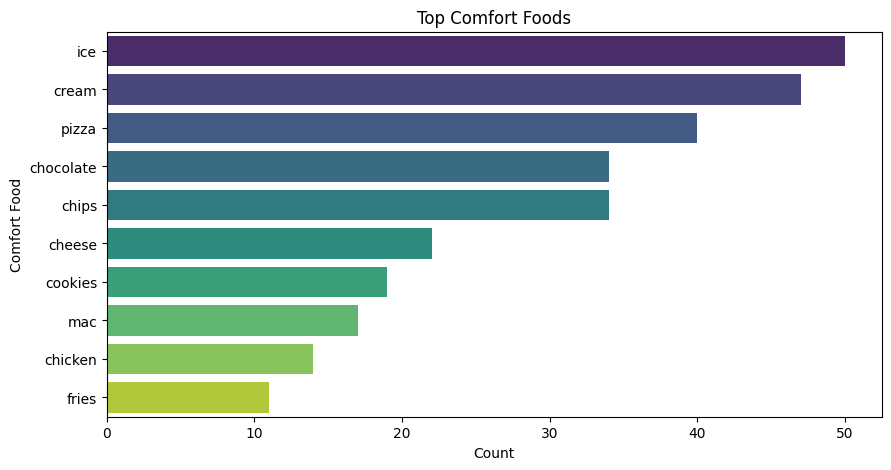

In [69]:
# Function to plot top N items from a list column
def plot_top_items(df, column, title, xlabel, ylabel, top_n=10):
    all_items = [item for sublist in df[column] for item in sublist if item not in ['and','or','a','of','with','the','cuisine']]
    item_counts = Counter(all_items).most_common(top_n)
    items, counts = zip(*item_counts)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(items), palette="viridis")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot Top Comfort Foods
plot_top_items(df, "comfort_food_list", "Top Comfort Foods", "Count", "Comfort Food")


### Top Favorite Cuisines from Survery

<ipython-input-69-1dd8ae214088>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(items), palette="viridis")


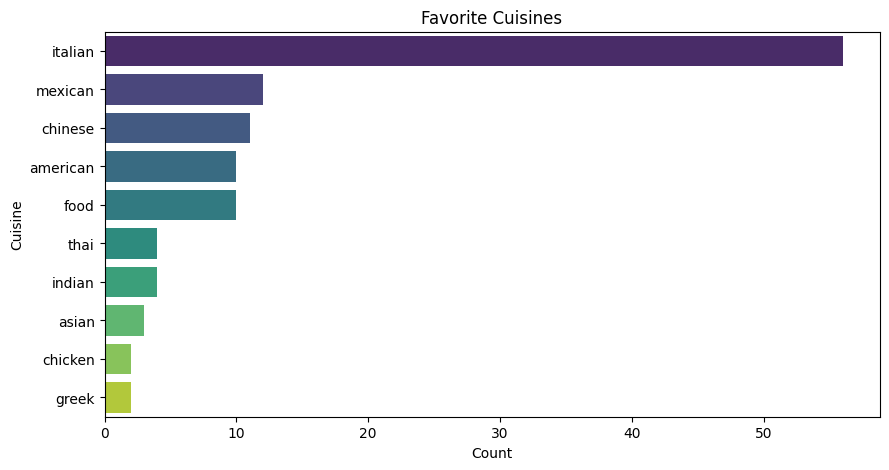

In [70]:
# Plot Favorite Cuisines
plot_top_items(df, "fav_cuisine_list", "Favorite Cuisines", "Count", "Cuisine")


### Top Meals to Share with Friends from Survery

<ipython-input-69-1dd8ae214088>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(items), palette="viridis")


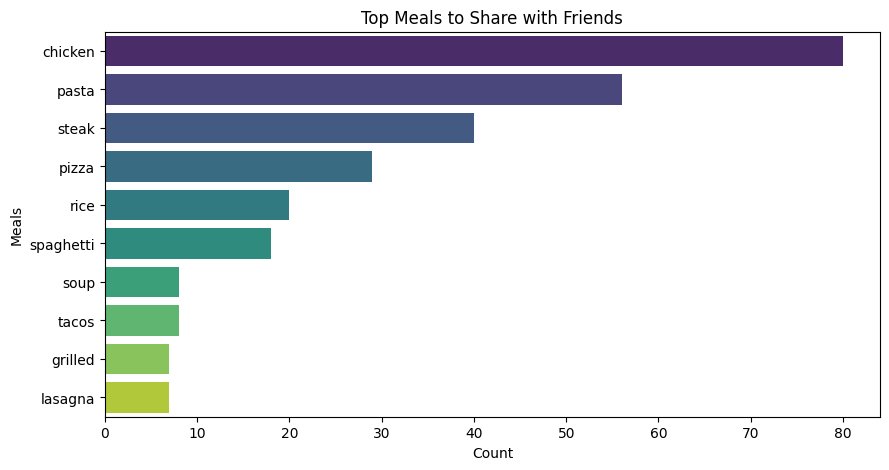

In [71]:
# Meals to share with freinds Consumption Distribution
plot_top_items(df, "meals_dinner_friend_list", "Top Meals to Share with Friends", "Count", "Meals")


### Correlation of Weight and Favorite Cuisien from Survery

<ipython-input-72-f77b604de828>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_exploded, x="fav_cuisine_list", y="weight_cleaned", palette="coolwarm")


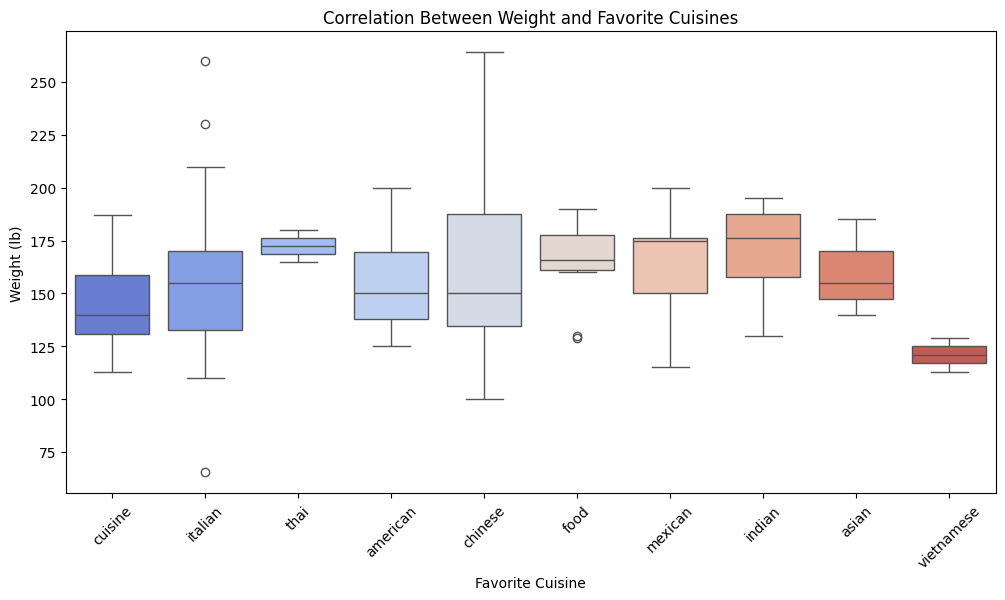

In [72]:
# Explode the 'fav_cuisine_list' to create multiple rows for multi-cuisine preferences
df_exploded = df.explode("fav_cuisine_list")

# Remove missing values
df_exploded = df_exploded.dropna(subset=["weight_cleaned", "fav_cuisine_list"])

# Limit to most common cuisines (top 10)
top_cuisines = df_exploded["fav_cuisine_list"].value_counts().index[:13]
top_cuisines = top_cuisines.drop(["and",'or','i'])
df_exploded = df_exploded[df_exploded["fav_cuisine_list"].isin(top_cuisines)]

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_exploded, x="fav_cuisine_list", y="weight_cleaned", palette="coolwarm")
plt.xlabel("Favorite Cuisine")
plt.ylabel("Weight (lb)")
plt.title("Correlation Between Weight and Favorite Cuisines")
plt.xticks(rotation=45)
plt.show()

### Correlation of Weight and Favorite Type of Sport from Survery

<ipython-input-73-3d15f9b7f294>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_exploded, x="type_sports_list", y="weight_cleaned", palette="coolwarm")


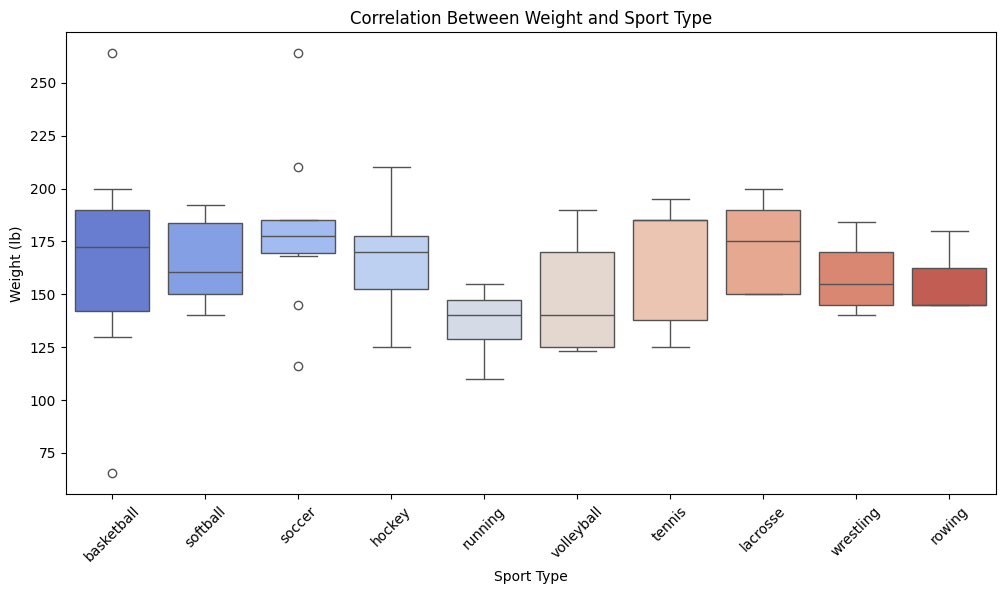

In [73]:
# Explode the 'fav_cuisine_list' to create multiple rows for multi-cuisine preferences
df_exploded = df.explode("type_sports_list")

# Remove missing values
df_exploded = df_exploded.dropna(subset=["weight_cleaned", "type_sports_list"])

# Limit to most common cuisines (top 10)
top_cuisines = df_exploded["type_sports_list"].value_counts().index[:13]
top_cuisines = top_cuisines.drop(["and",'none','i'])
df_exploded = df_exploded[df_exploded["type_sports_list"].isin(top_cuisines)]

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_exploded, x="type_sports_list", y="weight_cleaned", palette="coolwarm")
plt.xlabel("Sport Type")
plt.ylabel("Weight (lb)")
plt.title("Correlation Between Weight and Sport Type")
plt.xticks(rotation=45)
plt.show()